In [1]:
import pandas as pd

# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)

# Ver las primeras filas
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])  # Asegura que la columna 'date' sea datetime
df.set_index('date', inplace=True)
df = df.sort_index()  # Ordenar por fecha si no lo está


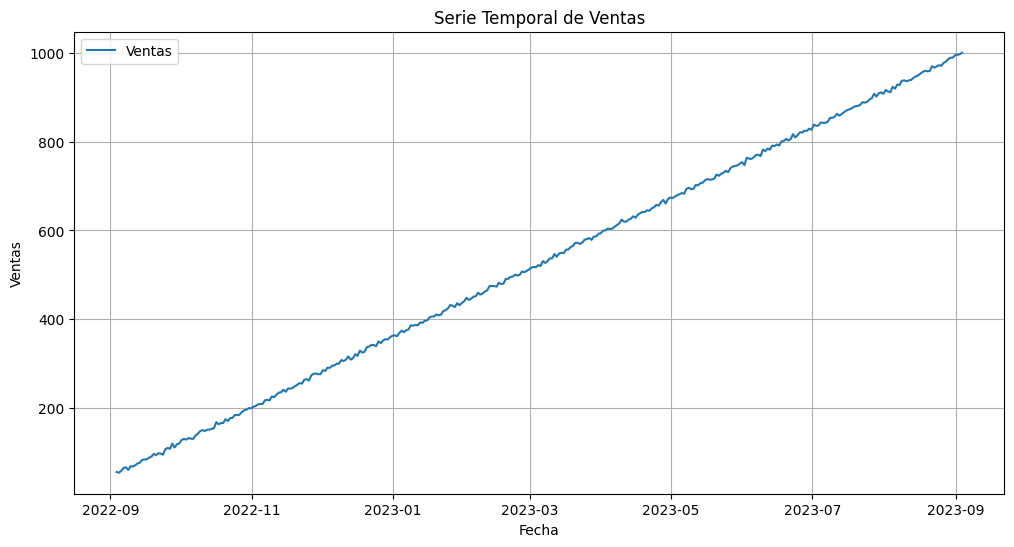

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Ventas')
plt.title('Serie Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


**¿Cuál es el tensor de la serie temporal?**

In [5]:
df['sales'].shape  # Muestra la dimensión del tensor (número de observaciones)

(366,)

In [6]:
import numpy as np

tensor = df['sales'].values  # Esto sería el "tensor" de ventas
tensor

array([  55.29215704,   53.80321135,   58.1416934 ,   64.53089878,
         66.01363287,   60.08186499,   68.46670361,   67.76510646,
         70.51226125,   74.65645304,   76.45952797,   82.99295751,
         83.51598989,   84.20064149,   87.76994586,   90.04211887,
         96.12607284,   93.63110055,   97.78851817,   96.88976758,
         94.39582507,  106.61839003,  109.85358257,  107.63651864,
        119.2750173 ,  110.70539613,  117.80850843,  119.71242105,
        127.47504997,  129.88752836,  128.54703406,  131.81941907,
        130.62431399,  129.94802155,  137.44941424,  141.56493732,
        147.38950218,  149.90850941,  147.74212914,  150.59994106,
        150.96393015,  152.45227496,  154.19625792,  167.7701344 ,
        162.9915914 ,  165.80906477,  165.96764132,  174.66123819,
        170.08981331,  176.89602573,  177.45058662,  183.90043352,
        183.81005034,  184.40330893,  190.46339852,  194.43568054,
        195.95297632,  199.26358008,  199.05593783,  202.47342

**¿Cuál es la tendencia?**

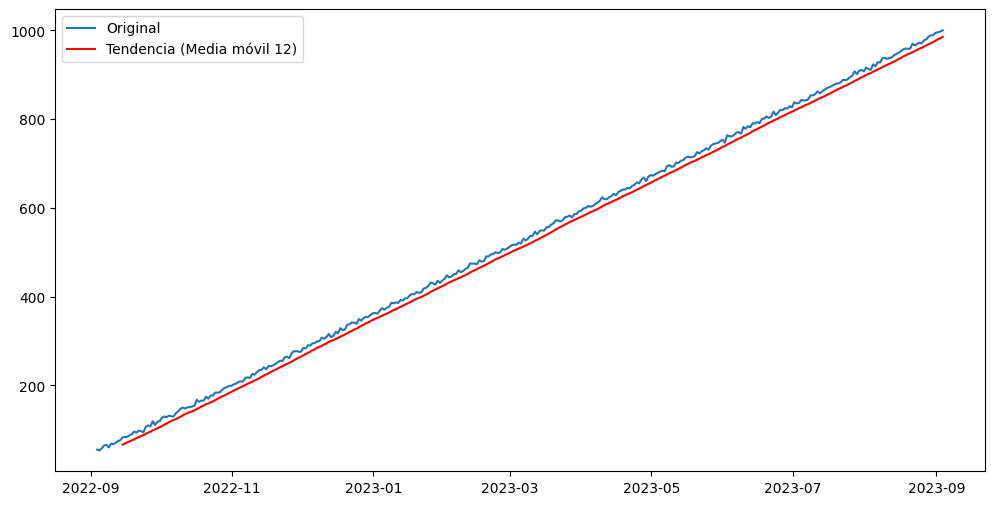

In [7]:
df['rolling_mean'] = df['sales'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Original')
plt.plot(df['rolling_mean'], label='Tendencia (Media móvil 12)', color='red')
plt.legend()
plt.show()

**¿Es estacionaria?**

Una serie es estacionaria si su media, varianza y covarianza no cambian con el tiempo. Para comprobarlo, usamos el test de Dickey-Fuller aumentado (ADF)

Si el p-value < 0.05, la serie es estacionaria.

Si el p-value >= 0.05, no es estacionaria.

In [8]:
!pip install statsmodels



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['sales'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


El p-value es muy alto (0.986 > 0.05): la serie NO es estacionaria

Esto quiere decir que:

    La media y/o la varianza cambian con el tiempo.

    Podría haber tendencia o estacionalidad persistente.

    Es probable que necesitemos diferenciar la serie o transformarla para aplicar modelos como ARIMA.

¿Existe variabilidad o ruido?

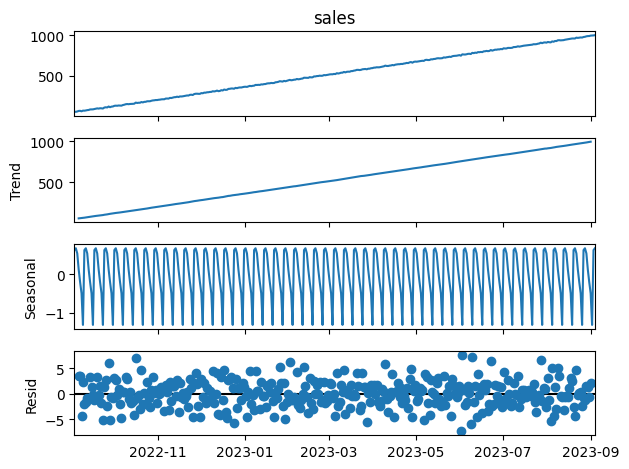

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['sales'], model='additive')
decomposition.plot()
plt.show()

📊 Análisis visual de la serie temporal (sales)

    🔺 Tendencia (Trend):

        Claramente creciente.

        Esto confirma que la serie no es estacionaria, ya que hay un cambio sistemático en el nivel de las ventas a lo largo del tiempo.

    📈 Estacionalidad (Seasonal):

        Se observa un patrón cíclico regular y bastante pronunciado.

        Parece ser estacionalidad semanal o mensual, con oscilaciones regulares.

    🌫️ Ruido (Resid):

        Los residuos fluctúan alrededor de cero.

        No hay un patrón claro, lo cual es bueno: parece que el modelo capta bien la tendencia y la estacionalidad, dejando solo ruido blanco.

    📉 Serie original (sales):

        Refleja la combinación de estos tres componentes: tendencia creciente, estacionalidad regular y algo de ruido.

✅ Resumen de respuestas:

    ¿Cuál es el tensor de la serie temporal?
    Es un array unidimensional indexado por fecha, de tipo pandas.Series.
    Ejemplo: df['sales'].shape → (n,), siendo n el número de registros.

    ¿Cuál es la tendencia?
    Creciente y bastante clara. Las ventas aumentan de manera sostenida.

    ¿Es estacionaria?
    No. Lo confirma tanto el test de ADF (p-value ≈ 0.986) como la presencia de tendencia y estacionalidad.

    ¿Existe variabilidad o presencia de ruido?
    Sí. El componente de residuo muestra variabilidad moderada, que puede considerarse ruido aleatorio (sin patrones claros).

In [11]:
# Diferenciación de primer orden
df['sales_diff'] = df['sales'].diff()

# Eliminar el primer valor NaN que genera la diferencia
df_diff = df['sales_diff'].dropna()


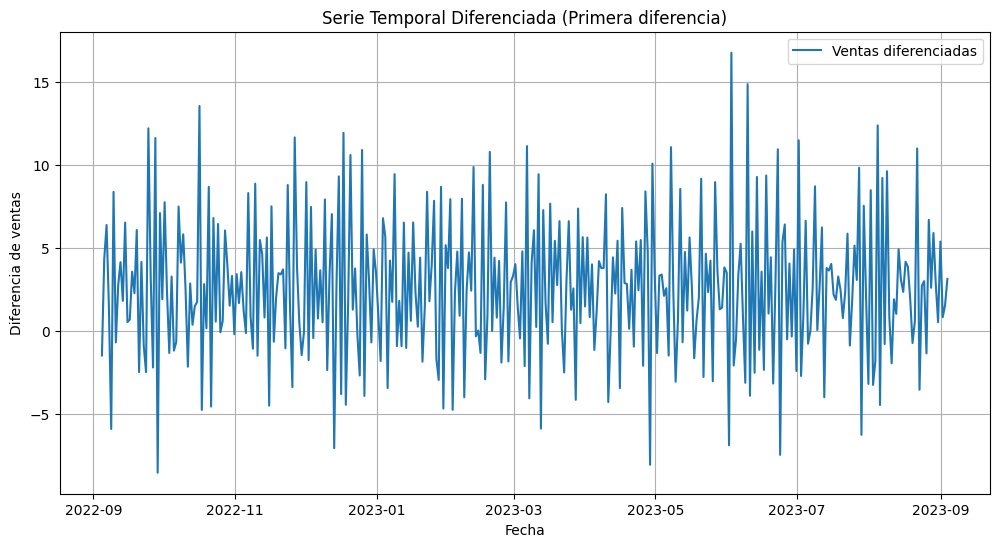

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='Ventas diferenciadas')
plt.title('Serie Temporal Diferenciada (Primera diferencia)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de ventas')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

adf_result_diff = adfuller(df_diff)
print("ADF Statistic (diferenciada):", adf_result_diff[0])
print("p-value (diferenciada):", adf_result_diff[1])


ADF Statistic (diferenciada): -9.430263118334729
p-value (diferenciada): 5.212954111417404e-16


Conclusión: la serie diferenciada ES ESTACIONARIA

In [24]:
!pip install pmdarima


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject